In [1]:
import matplotlib.pyplot as plt

from pathlib import Path

import numpy as np

import itertools

import pandas as pd

plt.style.use('grayscale')

from matplotlib.ticker import PercentFormatter

path_data = Path.cwd().parent / 'data'

In [2]:
# scen_param_settings={'scenario_name': ['ccedisruption'],
#                      'ss_mode': ['periodic', 'continuous'],
#                      'ss_replenishment_source': ['phc', 'dvs'],
#                      'phc_replenishment_disrupt': [0],
#                      'annual_cce_disruptions': [1, 2, 3, 4]}

In [21]:
plot_constants = {'levels' : ['overall', 'phc', 'ss'],
                  'metrics' : ['median_delay', 'delay_greater_30', 'frac_vac'],
                  'ss_mode - source' : ['periodic - phc', 'continuous - phc', 'continuous - dvs']}

scenario_specs = {'ccedisruption' : 'annual_cce_disruptions', 
                  'replenishmentdisruption' : 'phc_replenishment_disrupt'}

metric_labels = {'median_delay' : 'Median Delay in days',
                'delay_greater_30': '% delayed more than 30 days',
                'frac_vac': '% of total vaccinated'}

df_dict = {}

In [22]:
df_dict['median_delay'] = pd.read_csv(path_data / '07 median_delay_cce_disruption_df.csv')
df_dict['delay_greater_30'] = pd.read_csv(path_data / '07 delay_greater_30_cce_disruption_df.csv')
df_dict['frac_vac'] = pd.read_csv(path_data / '07 frac_vac_cce_disruption_df.csv')

<Figure size 432x288 with 0 Axes>

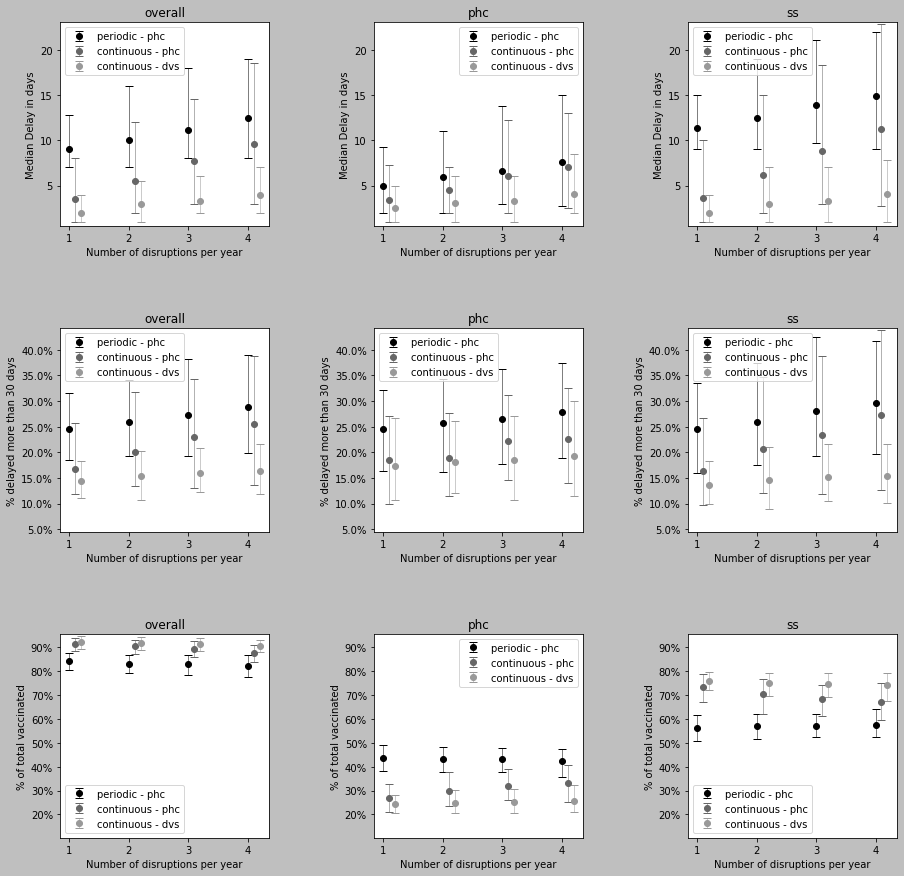

In [24]:
plt.clf()
fig, ax = plt.subplots(nrows = len(df_dict.keys()), ncols = len(plot_constants['levels']),figsize=(15,15))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

row = 0
for metric in df_dict.keys():
    df = df_dict[metric].copy()
    df['ss_mode - source'] = df['ss_mode'] + " - " + df['ss_replenishment_source']
    col = 0
    
    lev_plot_max = 0
    lev_plot_min = 100

    for lev in plot_constants['levels']:
        j=0
        for scen in plot_constants['ss_mode - source']:
            scen_df = df[df['ss_mode - source'] == scen]
            x_axis_array = scen_df['ccedisruption'].unique()
            val_mean, val_lower, val_upper = [], [], []

            for grp in x_axis_array:
                m = scen_df.loc[scen_df['ccedisruption']==grp, lev].mean()
                l = scen_df.loc[scen_df['ccedisruption']==grp, lev].quantile(0.025)
                u = scen_df.loc[scen_df['ccedisruption']==grp, lev].quantile(0.975)
                
                lev_plot_min = min(lev_plot_min, np.min(l))
                lev_plot_max = max(lev_plot_max, np.max(u))
                
                val_mean.append(m)
                val_lower.append(np.array(m) - np.array(l))
                val_upper.append(np.array(u) - np.array(m))
            ax[row,col].errorbar(x_axis_array+0.1*j, val_mean, yerr=[val_lower, val_upper], fmt='o', elinewidth = 0.5, capsize = 4, label = scen)
            ax[row,col].set_title(lev)
            ax[row,col].set_xlabel('Number of disruptions per year')
            ax[row,col].set_ylabel(metric_labels[metric])
            ax[row,col].legend(loc="best")
            
#             if metric  in ['delay_greater_30', 'frac_vac']:
#                 vals = ax[row,col].get_yticks()
#                 ax[row,col].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
            j+=1
    #        print(f'{lev} \n {scen} \n {val_lower} \n {val_mean} \n {val_upper} \n --------------------------')
    #         ax[i].li(x_axis_array, val_mean, fmt='o')
        col+=1
        
    for col_idx in range(len(plot_constants['levels'])):
        ax[row, col_idx].set_ylim([lev_plot_min - 0.5*lev_plot_min, lev_plot_max + 0.01*lev_plot_max])
        if metric  in ['delay_greater_30', 'frac_vac']:
            ax[row, col_idx].yaxis.set_major_formatter(PercentFormatter(1))
    
        
    row+=1

plt.show()

In [6]:
df_dict['median_delay'] = pd.read_csv(path_data / '07 median_delay_df.csv')
df_dict['delay_greater_30'] = pd.read_csv(path_data / '07 delay_greater_30_df.csv')
df_dict['frac_vac'] = pd.read_csv(path_data / '07 frac_vac_df.csv')

median_delay - overall - periodic - phc : 10.67125
median_delay - overall - continuous - phc : 6.56875
median_delay - overall - continuous - dvs : 3.0275
median_delay - phc - periodic - phc : 6.26125
median_delay - phc - continuous - phc : 5.26
median_delay - phc - continuous - dvs : 3.215
median_delay - ss - periodic - phc : 13.16
median_delay - ss - continuous - phc : 7.4575
median_delay - ss - continuous - dvs : 3.06
delay_greater_30 - overall - periodic - phc : 0.26653888570999995
delay_greater_30 - overall - continuous - phc : 0.2135082000224999
delay_greater_30 - overall - continuous - dvs : 0.15547624468
delay_greater_30 - phc - periodic - phc : 0.26128491786999986
delay_greater_30 - phc - continuous - phc : 0.2060076397974998
delay_greater_30 - phc - continuous - dvs : 0.18321785820250003
delay_greater_30 - ss - periodic - phc : 0.2704442469825001
delay_greater_30 - ss - continuous - phc : 0.2189414670774999
delay_greater_30 - ss - continuous - dvs : 0.14652062354250003
frac_va

<Figure size 432x288 with 0 Axes>

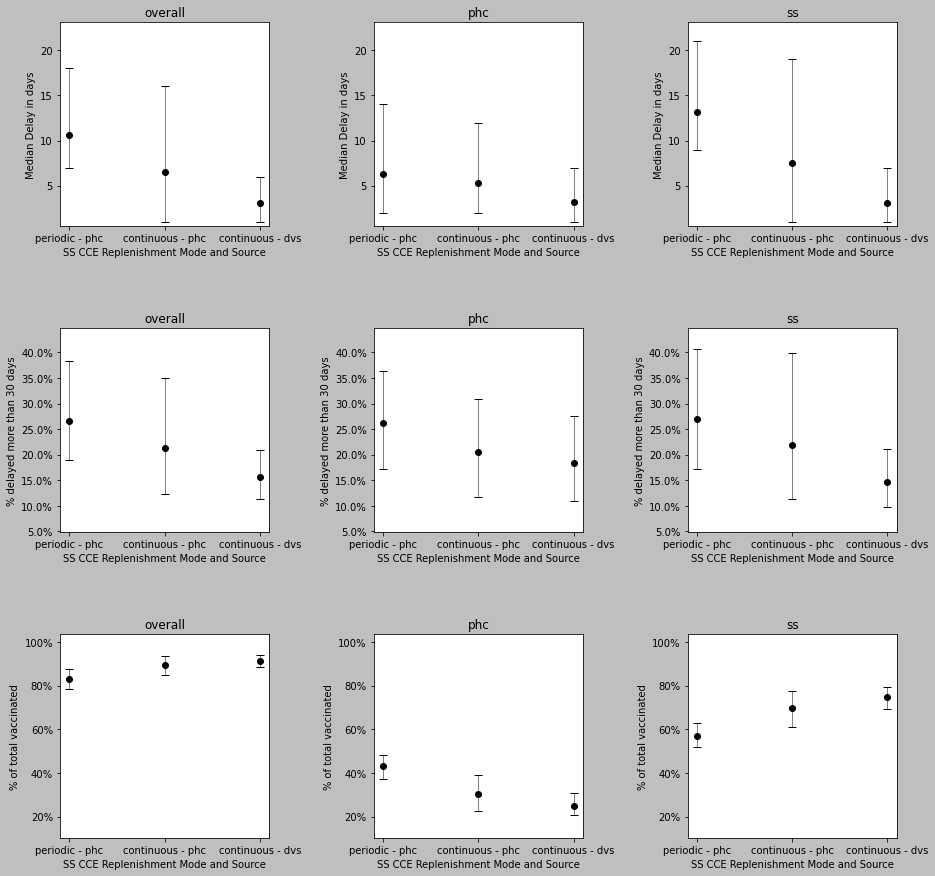

In [20]:
plt.clf()
fig, ax = plt.subplots(nrows = len(df_dict.keys()), ncols = len(plot_constants['levels']),figsize=(15,15))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

row = 0
for metric in df_dict.keys():
    df = df_dict[metric].copy()
    df['ss_mode - source'] = df['ss_mode'] + " - " + df['ss_replenishment_source']
    col = 0
    
    lev_plot_max = 0
    lev_plot_min = 100

    for lev in plot_constants['levels']:
        j=0
        val_mean, val_lower, val_upper = [], [], []
        x_axis_array = plot_constants['ss_mode - source']
        
        for scen in plot_constants['ss_mode - source']:
            scen_df = df[df['ss_mode - source'] == scen]
            
            m = scen_df.loc[:, lev].mean()
            l = scen_df.loc[:, lev].quantile(0.025)
            u = scen_df.loc[:, lev].quantile(0.975)
                
            lev_plot_min = min(lev_plot_min, np.min(l))
            lev_plot_max = max(lev_plot_max, np.max(u))

            val_mean.append(m)
            val_lower.append(np.array(m) - np.array(l))
            val_upper.append(np.array(u) - np.array(m))
            
            print(f'{metric} - {lev} - {scen} : {m}')
            
        ax[row,col].errorbar(x_axis_array, val_mean, yerr=[val_lower, val_upper], fmt='o', elinewidth = 0.5, capsize = 4)
        ax[row,col].set_title(lev)
        ax[row,col].set_xlabel('SS CCE Replenishment Mode and Source')
        ax[row,col].set_ylabel(metric_labels[metric])
        j+=1
        col+=1
        
    for col_idx in range(len(plot_constants['levels'])):
        ax[row, col_idx].set_ylim([lev_plot_min - 0.5*lev_plot_min, lev_plot_max + 0.1*lev_plot_max])
        if metric  in ['delay_greater_30', 'frac_vac']:
            ax[row, col_idx].yaxis.set_major_formatter(PercentFormatter(1))
        
    row+=1

plt.show()

In [ ]:
lev_plot_min

In [ ]:
lev_plot_max

In [ ]:
lev_plot_max

In [ ]:
x_axis_array

In [ ]:
plt.clf()
plt.errorbar(x_axis_array, val_mean, yerr=[val_lower, val_upper], fmt='o')
plt.show()

In [ ]:
delay_type = ['choice_delay', 'supply_delay']
location_type = ['phc', 'ss']
#intervention_type = ['baseline', 'continuous', 'ccedisruption', 'replenishmentdisruption', 'ccedisruption_continuous', 'ccedisruption_continuous']
intervention_type = ['ccedisruption', 'replenishmentdisruption']
mode_type = ['periodic', 'continuous']

In [ ]:
# plt.clf()
# fig, ax = plt.subplots(nrows = len(delay_type) * len(location_type), ncols = 1,figsize=(5,20))
# plt.subplots_adjust(hspace=0.5)
# i = 0

# for x in itertools.product(delay_type, location_type):
#     box_plot_data = []
#     for i_type in intervention_type:
#         sim_data = np.loadtxt(path_data / f'07 out_{x[0]}_{x[1]}_{i_type}.csv', delimiter=',')
#         box_plot_data.append(sim_data[:,0])

#     ax[i].boxplot(box_plot_data)
#     ax[i].set_ylabel('% of total vaccinated')
#     ax[i].set_xlabel('Number of days since vaccine start date')
#     ax[i].set_title(f'{x[0]} -- {x[1]}')
# #     ax[i].axis(xmin=0,xmax=n_days)
    
#     i+=1
    
# plt.show()
# # choice_delay_phc_periodic = np.loadtxt(path_data / '07 out_choice_delay_phc.csv', delimiter=',')
# # choice_delay_phc_continuous = np.loadtxt(path_data / '07 out_choice_delay_phc_continuous.csv', delimiter=',')

CCE disruption plot

In [ ]:
data_dict = {}
groups = {}

df = pd.DataFrame({'delay_type':[], 'location_type':[], 'intervention_type':[], 'mode_type' : [], 'sensitivity': [], 'ci_mean': [], 'ci_low': [], 'ci_high': []})

In [ ]:
for x in itertools.product(delay_type, location_type, intervention_type, mode_type):
    data_dict[x[0] + "-" + x[1] + "-" + x[2] + "-" + x[3]] = np.loadtxt(path_data / f'07 out_{x[0]}_{x[1]}_{x[2]}_{x[3]}.csv', delimiter=',')
    groups[x[0] + "-" + x[1] + "-" + x[2] + "-" + x[3]] = np.unique(data_dict[x[0] + "-" + x[1] + "-" + x[2] + "-" + x[3]][:,-1])

In [ ]:
plt.clf()
fig, ax = plt.subplots(nrows = len(delay_type) * len(location_type) * len(intervention_type), ncols = 1,figsize=(5,30))
plt.subplots_adjust(hspace=0.5)

plt_idx = 0

for del_type in delay_type:
    for loc_type in location_type:
        for int_type in intervention_type:
            for mod_type in mode_type:
                if del_type == 'supply_delay':
                    data_dict["supply_delay-" + loc_type + "-" + int_type + "-" + mod_type][:,0] = data_dict["supply_delay-" + loc_type + "-" + int_type + "-" + mod_type][:,0] - 365 + data_dict["choice_delay-" + loc_type + "-" + int_type + "-" + mod_type][:,:-1].sum(axis = 1)

                delay_less_30 = data_dict[del_type + "-" + loc_type + "-" + int_type + "-" + mod_type][:,0]
                frac_less_30 = delay_less_30 / np.sum(data_dict[del_type + "-" + loc_type + "-" + int_type + "-" + mod_type][:,:-1], axis = 1)
                
                for i in groups[del_type + "-" + loc_type + "-" + int_type + "-" + mod_type]:
                    group_index = np.where(data_dict[del_type + "-" + loc_type + "-" + int_type + "-" + mod_type][:,-1] == i)
                    group_data = frac_less_30[group_index]
                    ci_low = np.round(np.quantile(group_data, 0.025),2)
                    ci_high = np.round(np.quantile(group_data, 0.975),2)
                    ci_mean = np.round(np.mean(group_data),2)
                    append_df = {'delay_type':del_type, 'location_type':loc_type, 'intervention_type':int_type, 'mode_type': mod_type, 'sensitivity': i, 'ci_mean': ci_mean, 'ci_low': ci_low, 'ci_high': ci_high}
                    df = df.append(append_df, ignore_index=True)


                plot_df = df[(df['delay_type']==del_type) & (df['location_type']==loc_type) & (df['intervention_type']==int_type) & (df['mode_type']==mod_type)].drop_duplicates()
                x = groups[del_type + "-" + loc_type + "-" + int_type + "-" + mod_type]
                ax[plt_idx].plot(x, plot_df['ci_mean'], marker = "o", label = mod_type)
                ax[plt_idx].legend(loc="lower left")
                ax[plt_idx].fill_between(x, plot_df['ci_low'], plot_df['ci_high'], color='b', alpha=.1)
                ax[plt_idx].set_title(del_type + "-" + loc_type + "-" + int_type)
                if int_type == "ccedisruption":
                    ax[plt_idx].set_xlabel("Number of CCE disruptions per year")
                else:
                    ax[plt_idx].set_xlabel("Frequency of replenishment disruptions")
                ax[plt_idx].set_ylabel("% delayed less than 30 days")
#                 ax[plt_idx].yaxis.set_major_formatter(PercentFormatter(0))
            plt_idx+=1
plt.show()

In [ ]:
df.to_csv(path_data / 'delay_plots_dataframe.csv', index = False)

In [ ]:
plot_df

In [ ]:
print(del_type, loc_type, int_type)

In [ ]:
plt.clf()
plt.style.use('Solarize_Light2')
x = ci_mean['phc'].keys()
fig, ax = plt.subplots()
ax.plot(ci_mean['phc'].keys(),ci_mean['phc'].values(), marker = "o")
ax.fill_between(ci_mean['phc'].keys(), ci_low25['phc'].values(), ci_hi25['phc'].values(), color='b', alpha=.1)
#ax.set_ylim([])
plt.show()

In [ ]:
ci_mean

In [ ]:
ci_hi25

In [ ]:
ci_low25

In [ ]:
plt.style.use("dark_background")

fig = plt.figure(figsize =(6, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(box_data_choice_delay_phc)

# show plot
plt.show()

In [ ]:
choice_delay_ss_periodic = np.loadtxt(path_data / '07 out_choice_delay_ss.csv', delimiter=',')
choice_delay_ss_continuous = np.loadtxt(path_data / '07 out_choice_delay_ss_continuous.csv', delimiter=',')

In [ ]:
box_data_choice_delay_ss = [choice_delay_ss_periodic[:,0], choice_delay_ss_continuous[:,0]]

In [ ]:
plt.style.use("dark_background")

fig = plt.figure(figsize =(6, 4))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(box_data_choice_delay_ss)

# show plot
plt.show()